<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonCourse/blob/main/Assignment3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()




In [5]:
# Data Preprocessing
# Normalize pixel values and flatten images
x_train_flatten = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flatten = x_test.reshape(x_test.shape[0], -1) / 255.0

In [6]:
# Model Building - Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=3, n_jobs=-1)
rf_grid_search.fit(x_train_flatten, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [7]:
# Model Building - K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7]}
knn_grid_search = GridSearchCV(knn_model, knn_params, cv=3, n_jobs=-1)
knn_grid_search.fit(x_train_flatten, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]})

In [8]:
# Model Evaluation
# Random Forest
rf_pred = rf_grid_search.predict(x_test_flatten)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_classification_report = classification_report(y_test, rf_pred, target_names=[str(i) for i in range(10)])

# K-Nearest Neighbors
knn_pred = knn_grid_search.predict(x_test_flatten)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_classification_report = classification_report(y_test, knn_pred, target_names=[str(i) for i in range(10)])

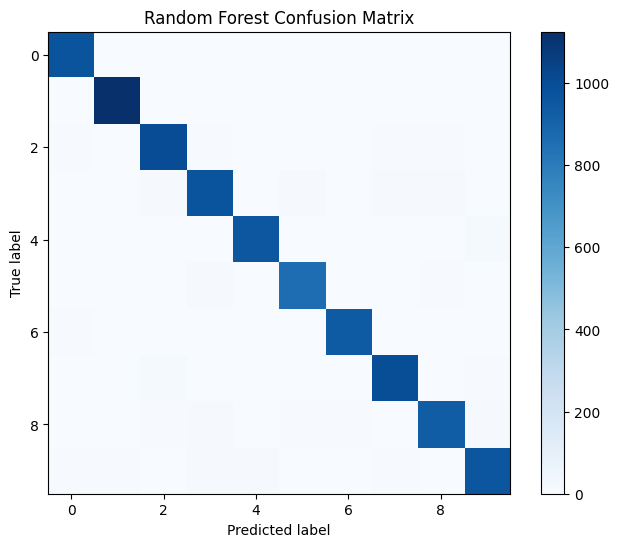

In [9]:
# Visualize confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
plt.imshow(rf_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

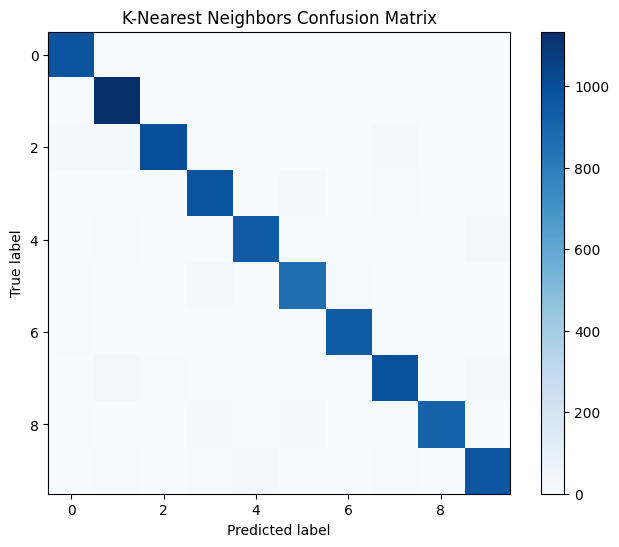

In [10]:
# Visualize confusion matrix for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
plt.imshow(knn_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [11]:
# Print evaluation metrics
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_classification_report)

print("\nK-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report:\n", knn_classification_report)

Random Forest Accuracy: 0.9707
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


K-Nearest Neighbors Accuracy: 0.9705
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99  